In [62]:
# Copyright (c) 2019 Skymind AI Bhd.
# Copyright (c) 2020 CertifAI Sdn. Bhd.
#
# This program and the accompanying materials are made available under the
# terms of the Apache License, Version 2.0 which is available at
# https://www.apache.org/licenses/LICENSE-2.0.
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS, WITHOUT
# WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the
# License for the specific language governing permissions and limitations
# under the License.
#
# SPDX-License-Identifier: Apache-2.0

# Perform Classification by using K Nearest Neighbour (KNN)

In [63]:
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
import pandas as pd
import requests as req


import matplotlib.pyplot as plt
%matplotlib inline

## Classifying Iris Dataset With KNN
### Load Data
Here we will load the IRIS dataset from **scikit-learn**. We will be utilizing `iris.data` and `iris.target` as usual for our features and values.

In [64]:
iris = datasets.load_iris()

As usual `dir(iris)` shows the attributes of the iris datasets.<br> 
- `iris.data.shape` shows the shape of the data.<br>
- `iris.target_names` shows the classes that we want to classify.<br>
- `iris.feature_names` shows the name of features that we are training.

In [65]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [66]:
iris.data.shape

(150, 4)

In [67]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [68]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [69]:
data = iris.data.astype(np.float32)
target = iris.target.astype(np.float32)

In [70]:
X = pd.DataFrame(data = data, columns= iris.feature_names)
y = pd.DataFrame(data= target, columns= ["Y"])

Split data into train and test sets.

In [71]:
df = pd.concat([X, y], axis= 1)

In [72]:
# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]

In [73]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    data, target, test_size=0.3, random_state=123
)

In [74]:
X_train.shape, y_train.shape

((105, 4), (105,))

In [75]:
X_test.shape, y_test.shape

((45, 4), (45,))

### Model Training
We will use K Nearest Neighbours from scikit learn.

In [76]:
from sklearn.neighbors import KNeighborsClassifier

Initialize the model.<br>
Specify the number of neighbors to 3.

In [77]:
# TODO: Assign number of neighbors, k=3

model = KNeighborsClassifier(n_neighbors = 3)

Train the model by using train dataset.

In [78]:
# TODO: Enter the code to call fit the training data into the model
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Evaluation

In [79]:
predictions = model.predict(X_test)

The method `metrics.confusion_matrix` will visualize the performance of the model through a confusion matrix. 

In [80]:
print(metrics.confusion_matrix(y_test,predictions))

[[18  0  0]
 [ 0  9  1]
 [ 0  1 16]]


In [81]:
metrics.accuracy_score(y_test, predictions)

0.9555555555555556

## Classifying Glass Dataset from UCI Machine Learning Repository

### Load Data

Here, we load the glass data from UCI ML Repository into a Dataframe using **pandas**.<br> `glass` will be storing the dataset, `description` will store the text with the description of the data.

In [82]:
glass = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data", 
    names=['ID','Refractive Index','Na','Mg','Al','Si','K','Ca','Ba','Fe','Class']
)
description = req.get("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.names").text

In [83]:
print(description)

1. Title: Glass Identification Database

2. Sources:
    (a) Creator: B. German
        -- Central Research Establishment
           Home Office Forensic Science Service
           Aldermaston, Reading, Berkshire RG7 4PN
    (b) Donor: Vina Spiehler, Ph.D., DABFT
               Diagnostic Products Corporation
               (213) 776-0180 (ext 3014)
    (c) Date: September, 1987

3. Past Usage:
    -- Rule Induction in Forensic Science
       -- Ian W. Evett and Ernest J. Spiehler
       -- Central Research Establishment
          Home Office Forensic Science Service
          Aldermaston, Reading, Berkshire RG7 4PN
       -- Unknown technical note number (sorry, not listed here)
       -- General Results: nearest neighbor held its own with respect to the
             rule-based system

4. Relevant Information:n
      Vina conducted a comparison test of her rule-based system, BEAGLE, the
      nearest-neighbor algorithm, and discriminant analysis.  BEAGLE is 
      a product available 

The `glass` dataset is a combination of features and categories. From the description, we know that the features that we are interested are in columns **2 - 10**. <br>It is common practice that most of the data have their **expected value/ categories** in the last column, which is also the case in this dataset.<br><br> Using `iloc`, separate the data into :<br> `glass_data` which contains features <br>`glass_target` which contains expected values/ categories.

In [84]:
glass_data = glass.iloc[:,1:-1]
glass_target = glass.iloc[:,-1]

In [85]:
glass_target.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Class, dtype: int64

<AxesSubplot:>

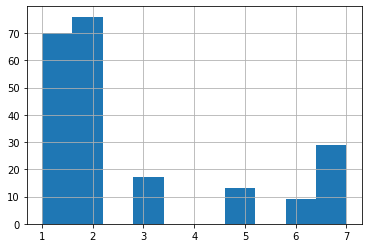

In [86]:
glass_target.hist()

Notice that the amounts of data in each class varies too much. This is a showcase of what's called **imbalanced data**.<br><br>
There are a few ways to tackle this problem. Here, we are choosing to use a method called **oversampling**.<br><br>
**Oversampling** refers to increasing the number of data points in the minority classes.<br><br>
There are a few techniques for oversampling:
1. Random sampling
2. SMOTE: Synthetic Minority Over-sampling Technique
3. ADASYN: Adaptive Synthetic Sampling

For more details about oversampling do refer to https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/.<br><br>
In this case, we are going to utilize `SMOTE` as `SMOTE` can avoid overfitting.To oversample the data, we are going to utilize a external library called `imblearn`.<br><i>Note: To install this library, run this command: `pip install imblearn` in command line/ terminal.

In [87]:
!pip install imblearn

You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [88]:
oversample = SMOTE()
glass_data, glass_target = oversample.fit_resample(glass_data,glass_target)

<AxesSubplot:>

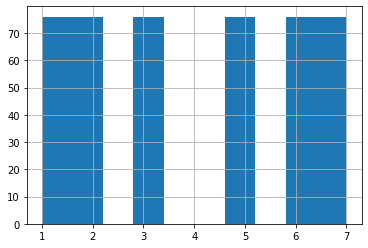

In [89]:
glass_target.hist()

Split `glass_data_scaled` into **test and train data**.<br>Test size = 0.3

In [90]:
# TODO: Split data into 70% training and 30% test
X_train2, X_test2, y_train2, y_test2 = model_selection.train_test_split(
    glass_data, glass_target, test_size=0.3, random_state=123
)

Perform **feature scaling** on the `X_train2`,`X_test2` into **`X_train2_scaled`** and **`X_test2_scaled`** respectively.<br>
<I>Hint: fit_transform on the training data and transform only on the test data

In [91]:
# TODO: Replace {} with your answer to scale the data

scaler = preprocessing.StandardScaler()
X_train2_scaled = scaler.fit_transform(X_train2)
X_test2_scaled = scaler.fit_transform(X_test2)

### Model Training

Initialize KNN Model named `model_2` with `k=3`

In [92]:
# TODO: Initialize KNN model

model_2 = KNeighborsClassifier(n_neighbors= 3)

In [93]:
# TODO: Fit data into the model to train the model

model_2.fit(X_train2_scaled, y_train2)

KNeighborsClassifier(n_neighbors=3)

### Evaluation

Predict the values for the test data and do an **`accuracy test`** and a **`confusion matrix`**.

In [94]:
prediction = model_2.predict(X_test2_scaled)
metrics.accuracy_score(y_test2,prediction)

0.8613138686131386

In [95]:
metrics.confusion_matrix(y_test2,prediction)

array([[20,  3,  3,  0,  0,  0],
       [ 7,  9,  4,  0,  0,  0],
       [ 1,  0, 22,  0,  0,  0],
       [ 0,  0,  0, 26,  0,  0],
       [ 0,  0,  0,  0, 19,  0],
       [ 1,  0,  0,  0,  0, 22]], dtype=int64)

Besides accuracy score and confusion matrix, **precision** and **recall** both provide some insights to any classification model that you're trying to train.<br>
- **`Precision`** : the percentage of your results which are relevant.
$$Precision = \frac{TP}{TP+FP}$$ 
where: <br>
$TP$ = True positive<br>
$FP$ = False positive<br><br>
- **`Recall`** :the percentage of total relevant results correctly classified by your algorithm. 
$$Recall = \frac{TP}{TP+FN}$$ 
where: <br>
$TP$ = True positive<br>
$FN$ = False negative<br>


In [96]:
print(metrics.recall_score(y_test2, prediction, average=None))

[0.76923077 0.45       0.95652174 1.         1.         0.95652174]


In [97]:
print(metrics.precision_score(y_test2,prediction,average=None))

[0.68965517 0.75       0.75862069 1.         1.         1.        ]


In [98]:
print(metrics.classification_report(y_test2, prediction))

              precision    recall  f1-score   support

           1       0.69      0.77      0.73        26
           2       0.75      0.45      0.56        20
           3       0.76      0.96      0.85        23
           5       1.00      1.00      1.00        26
           6       1.00      1.00      1.00        19
           7       1.00      0.96      0.98        23

    accuracy                           0.86       137
   macro avg       0.87      0.86      0.85       137
weighted avg       0.86      0.86      0.85       137



Occasionally we want to see if the model is overfit by the training data. In such cases we may try to measure the accuracy of the predictions by the training data itself.<br><br>
Here we try to compare both the results.<br><br>
If the accuracy is not that distinct from that of the test data, the model is well-fit.

In [104]:
print(metrics.accuracy_score(y_train2, model_2.predict(X_train2_scaled)))

0.9310344827586207


## References
C.L. Blake and C.J. Merz (1998). UCI repository of machine learning databases. University
of California. [www http://www.ics.uci.edu/∼mlearn/MLRepository.html]

Kohli, S. (2019, November 18). Understanding a Classification Report For Your Machine Learning Model. Retrieved August 06, 2020, from https://medium.com/@kohlishivam5522/understanding-a-classification-report-for-your-machine-learning-model-88815e2ce397